In [ ]:
# Test the working of the Jupyter notebook.

In [ ]:
print("Hello world!")

In [ ]:
# Opdracht 4.1: ZTDL 1 - First Deep Learning Model

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
# Hier worden de nodige bibliotheken geïmporteerd: NumPy voor numerieke berekeningen, 
# %matplotlib inline om ervoor te zorgen dat de grafieken binnen de notebook worden weergegeven, 
# en Matplotlib voor het maken van de grafieken.

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000,
                    noise=0.1,
                    factor=0.2,
                    random_state=0)

In [ ]:
# De make_circles functie van Scikit-learn wordt gebruikt om een dataset te maken met cirkelvormige clusters. 
# De n_samples parameter bepaalt het aantal punten in de dataset, noise voegt ruis toe aan de gegevens 
# en factor bepaalt de afstand tussen de twee cirkels. random_state zorgt ervoor dat de gegenereerde gegevens herhaalbaar zijn.

In [ ]:
X

In [ ]:
# Dit geeft de gegevens X weer, die de coördinaten van de punten zijn.

In [ ]:
X.shape

In [ ]:
# Dit toont de vorm van de gegevens X, wat het aantal rijen en kolommen van de dataset weergeeft.

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [ ]:
# Hier worden de punten gevisualiseerd met Matplotlib. 
# De punten worden geplot als blauwe cirkels ('ob') en rode kruizen ('xr'). 
# De alpha parameter bepaalt de transparantie van de punten. 
# Vervolgens worden de grenzen van de plot ingesteld en een legende en titel toegevoegd.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model = Sequential()

model.add(Dense(4, input_shape=(2,), activation='tanh'))

model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(learning_rate=0.5), 'binary_crossentropy', metrics=['accuracy'])

model.fit(X, y, epochs=20)

In [ ]:
# Nu begint het gedeelte dat een neuraal netwerk maakt en traint. 
# Eerst wordt een sequentiële model gedefinieerd. 
# Vervolgens worden de lagen van het model toegevoegd: 
# een invoerlaag met 2 neuronen (input_shape=(2,)), een verborgen laag met 4 neuronen en tanh activatiefunctie, 
# en een uitvoerlaag met 1 neuron en sigmoid activatiefunctie. 
# Het model wordt gecompileerd met Stochastic Gradient Descent (SGD) als optimizer en binair kruis-entropieverliesfunctie. 
# Het model wordt getraind op de gegevens X en y gedurende 20 epochs.

In [ ]:
hticks = np.linspace(-1.5, 1.5, 101)
vticks = np.linspace(-1.5, 1.5, 101)
aa, bb = np.meshgrid(hticks, vticks)
ab = np.c_[aa.ravel(), bb.ravel()]
c = model.predict(ab)
cc = c.reshape(aa.shape)

plt.figure(figsize=(5, 5))
plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.legend(['0', '1'])
plt.title("Blue circles and Red crosses")

In [ ]:
# Dit deel visualiseert de beslissingsgrens van het getrainde model. 
# Eerst worden roosterpunten gemaakt om te voorspellen met het model. 
# Vervolgens worden voorspellingen gedaan op deze roosterpunten en gevisualiseerd met een contourplot. 
# Daarna worden de originele punten geplot, net als eerder, maar nu bovenop de contourplot. 
# De legende en titel worden toegevoegd voor de plot.

In [ ]:
# Opdracht 4.2: ZTDL 2 - Data

In [369]:
# STEF'S DEEL

In [370]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('Datasets/ifood_df.csv')

df.head()



,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

In [372]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


In [373]:
df.query("Kidhome > 1")

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
113,19510.0,2,0,63,9,0,7,3,4,7,...,0,0,0,0,0,1,0,23,16,0
126,33762.0,2,1,61,53,1,34,2,0,16,...,0,0,0,0,0,0,1,90,74,0
137,35688.0,2,1,94,73,3,90,12,1,32,...,0,0,1,0,0,0,0,179,147,0
149,30523.0,2,1,0,5,0,3,0,0,5,...,0,0,0,0,0,1,0,8,3,0
153,43482.0,2,1,83,18,1,32,6,3,28,...,1,0,0,0,1,0,0,60,32,0
160,50447.0,2,0,4,85,7,24,2,3,27,...,0,0,0,0,1,0,0,121,94,0
166,38285.0,2,1,96,2,0,5,2,0,1,...,1,0,0,0,1,0,0,9,8,0
203,52195.0,2,1,2,12,0,4,0,0,1,...,0,0,1,0,0,0,0,16,15,0
245,40737.0,2,1,24,11,0,4,0,0,2,...,0,0,0,0,0,0,1,15,13,0
279,16626.0,2,0,76,8,3,22,21,1,13,...,1,0,0,0,1,0,0,55,42,0


In [374]:
df.sort_values('Kidhome', ascending = False).head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
866,46231.0,2,1,87,189,2,55,0,5,12,...,0,0,0,0,0,0,1,251,239,0
166,38285.0,2,1,96,2,0,5,2,0,1,...,1,0,0,0,1,0,0,9,8,0
203,52195.0,2,1,2,12,0,4,0,0,1,...,0,0,1,0,0,0,0,16,15,0
1907,29543.0,2,0,47,17,3,18,3,4,18,...,0,0,0,0,0,1,0,45,27,0
126,33762.0,2,1,61,53,1,34,2,0,16,...,0,0,0,0,0,0,1,90,74,0


In [375]:
df['Income'].value_counts()

7500.0     12
35860.0     4
18690.0     3
83844.0     3
47025.0     3
           ..
29999.0     1
65819.0     1
54132.0     1
60033.0     1
84835.0     1
Name: Income, Length: 1963, dtype: int64

In [376]:
df.groupby(['Kidhome', 'Teenhome'])['Income'].count()

Kidhome  Teenhome
0        0           628
         1           618
         2            30
1        0           494
         1           368
         2            21
2        0            17
         1            29
Name: Income, dtype: int64

In [377]:
df['Income'].min()

1730.0

In [378]:
df['Income'].max()

113734.0

In [379]:
df['Income'].mean()

51622.0947845805

In [380]:
df['Income'].median()

51287.0

In [381]:
df['Kidhome'] == 1
kidhome = df.corr()['Income'].sort_values()
kidhome

NumWebVisitsMonth      -0.648306
Kidhome                -0.531699
education_Basic        -0.239604
NumDealsPurchases      -0.132427
education_2n Cycle     -0.060621
Complain               -0.027488
Customer_Days          -0.024892
marital_Single         -0.015539
AcceptedCmp3           -0.011181
marital_Married        -0.010427
marital_Together       -0.001960
Recency                 0.006716
marital_Divorced        0.013892
education_Graduation    0.017644
education_Master        0.021633
Teenhome                0.042483
marital_Widow           0.044336
education_PhD           0.091176
AcceptedCmp2            0.110210
Response                0.174902
Age                     0.212625
AcceptedCmp4            0.233267
AcceptedCmp1            0.345242
AcceptedCmpOverall      0.388247
AcceptedCmp5            0.416386
MntGoldProds            0.417653
NumWebPurchases         0.503184
MntFruits               0.537920
MntFishProducts         0.551758
MntSweetProducts        0.555601
NumStorePu

<AxesSubplot:>

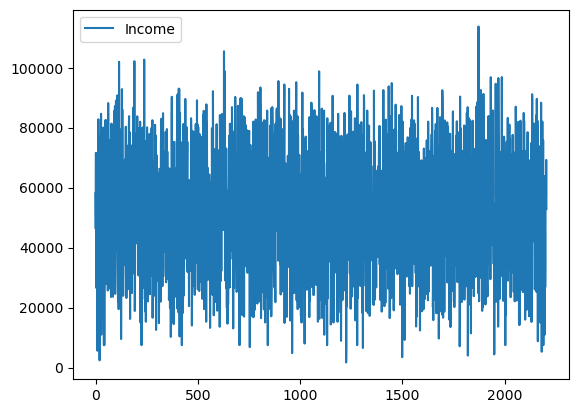

In [382]:
df[['Income']].plot()

<AxesSubplot:>

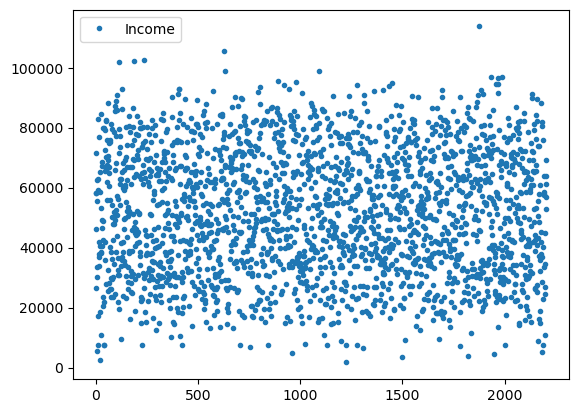

In [383]:
df[['Income']].plot(style='.')

<AxesSubplot:xlabel='Age'>

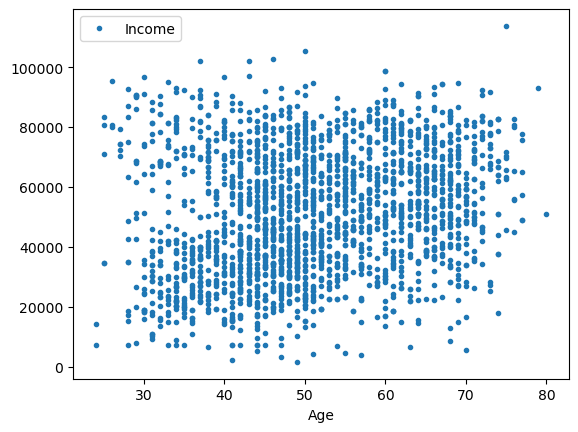

In [384]:
df.plot(style='.', x='Age', y='Income')

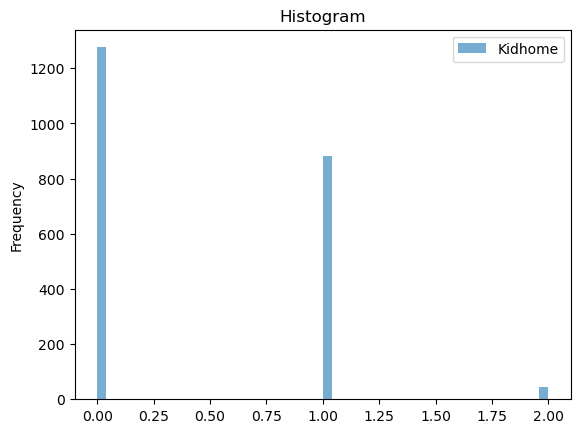

In [385]:
df[['Kidhome']].plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

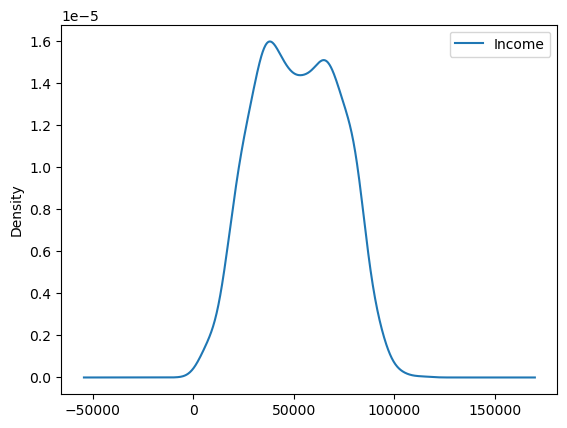

In [386]:
df[['Income']].plot(kind='kde');

In [387]:
incomeMeasurement = df['Income'] > 40000
piecounts = incomeMeasurement.value_counts()
piecounts

True     1474
False     731
Name: Income, dtype: int64

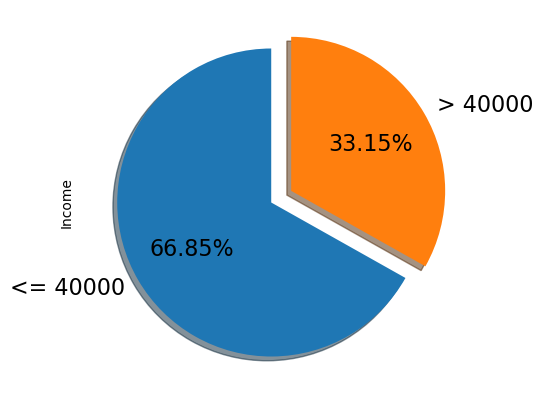

In [388]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 40000', '> 40000'],
               autopct='%1.2f%%',
               shadow=True,
               startangle=90,
               fontsize=16);

In [ ]:
# GERT-JAN'S DEEL

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('Datasets/vehicle_population_statistics.csv')

df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.query("Cars > 100000")

In [ ]:
df.sort_values('Cars', ascending = True).head()

In [ ]:
df['Cars'].value_counts()

In [ ]:
df.groupby(['Kidhome', 'Teenhome'])['Income'].count()

In [ ]:
df['Cars'].min()

In [ ]:
df['Cars'].max()

In [ ]:
df['Cars'].mean()

In [ ]:
df['Cars'].median()

In [ ]:
df['Kidhome'] == 1
kidhome = df.corr()['Income'].sort_values()
kidhome

In [ ]:
df[['Income']].plot()

In [ ]:
df[['Income']].plot(style='.')

In [ ]:
df.plot(style='.', x='Age', y='Income')

In [ ]:
df[['Kidhome']].plot(kind='hist',
        bins=50,
        title='Histogram',
        alpha=0.6);

In [ ]:
df[['Income']].plot(kind='kde');

In [ ]:
incomeMeasurement = df['Income'] > 40000
piecounts = incomeMeasurement.value_counts()
piecounts

In [ ]:
piecounts.plot(kind='pie',
               figsize=(5, 5),
               explode=[0, 0.15],
               labels=['<= 40000', '> 40000'],
               autopct='%1.2f%%',
               shadow=True,
               startangle=90,
               fontsize=16);

In [ ]:
# Opdracht 4.3

In [ ]:
df = pd.read_csv('Datasets/car_data.csv')

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD

In [ ]:
data = pd.read_csv('Datasets/car_data.csv')

In [ ]:
x = data['Kms_Driven'].values
y = data['Selling_Price'].values

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1, input_shape=(1,)))

In [ ]:
model.summary()

In [ ]:
model.compile(Adam(learning_rate=0.8), 'mean_squared_error')

In [ ]:
model.fit(x, y, epochs=100)

In [ ]:
y_pred = model.predict(x)

In [ ]:
df.plot(kind='scatter', x='Kms_Driven', y='Selling_Price')

In [ ]:
plt.plot(df['Kms_Driven'], y_pred, color='red')
plt.title("Prediction")
plt.xlabel('Kilometers Driven')
plt.ylabel('Predicted Values')

In [ ]:
W, B = model.get_weights()

In [ ]:
W

In [ ]:
B

In [ ]:
# Opdracht 5.1

In [398]:
from IPython.display import Image

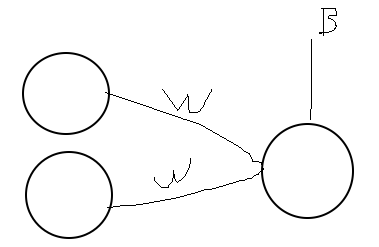

In [400]:
Image(filename = "Sketch Neural Network.png")

In [1]:
# Een shallow model is een model met maar 1 laag. En dat kan alleen lineaire beslissingsgrenzen leren.
# Als de dataset dus niet-liniair is zal het model niet goed werken.
# Ook is het shallow model te simpel om ingewikkeldere patronen in data te herkennen.

In [ ]:
# Opdracht 5.2 

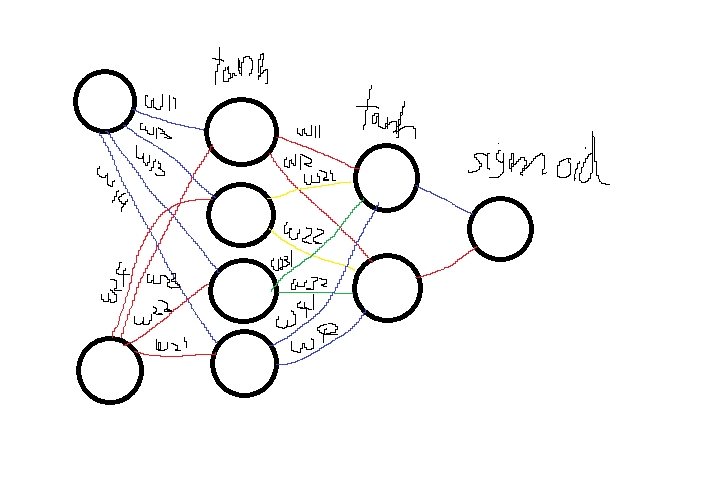

In [4]:
from IPython.display import Image
Image(filename = "Sketch Neural Network 2.png")

In [ ]:
# Dit model heeft 3 lagen 2 hidden layers en 1 output layer

In [6]:
# De gebruikte Optimizer is Adam. 
# Een optimizer is een algoritme dat de gewichten van het neurale netwerk aanpast om de verliesfunctie te minimaliseren.

In [ ]:
# De accuracy score van de train set is 0.999 en de accuracy score van de test set is 1.000 
# Dit betekent dat het model tijdens de train set goed kan classificeren en tijdens de test set kan het model ook goed
# classificeren met nieuwe data.

In [2]:
# Het verschil tussen in accuracy tussen de trainingset en de testset is klein. Ook zijn beide scores hoog.
# Dit betekent dat er waarschijnlijk geen sprake is van overfitting.